In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

from IPython.display import display, Latex

# Task 2

Applying the specified methods, implement an algorithm for the numerical solution of a differential equation with boundary conditions on an interval.

In [106]:
MESH = 1000


# Step size
def h(start, end, m=MESH):
    return (END - START) / m

### Finite Difference Method

(1) Using the finite difference method, construct a solution for the boundary value problem for an ordinary differential equation with a chosen step size.
$$
    y'' + x y' + 2y = 4x^3 
$$
$$
    y(0.5) + y'(0.5) = 1, \quad y(1) = 2
$$

In [104]:
# Interval
START = 0.5
END = 1.0

# Step
h_fd = h(START, END)

X_fd = np.linspace(START, END, MESH)

# Ay = b
A = np.zeros((MESH, MESH))
b = np.zeros(MESH)

# i = 1
A[0, 0] = h_fd - 1
A[0, 1] = 1
b[0] = h_fd

# i in [2, n-2]
for i in range(1, MESH - 2):
    xi = X_fd[i]
    
    A[i, i - 1] = 1 - (xi * h_fd) / 2      # y_(i-1)
    A[i, i]     = -2 + 2 * h_fd ** 2       # y_i  
    A[i, i + 1] = 1 + (xi * h_fd) / 2      # y_(i+1)
    
    b[i] = 4 * h_fd ** 2 * xi ** 3

# i = n-1:
i = MESH - 2
xi = X_fd[i]

A[i, i - 1] = 1 - (xi * h_fd) / 2      # y_(MESH-2)
A[i, i] = -2 + 2 * h_fd ** 2           # y_(MESH-1)
b[i] = 4 * h_fd ** 2 * xi ** 3 - 2

# i = n
A[MESH - 1, MESH - 1] = 1
b[MESH - 1] = 2

# Solve SLAE
Y_fd = np.linalg.solve(A, b)

### Collocation and Galerkin Methods

(2) Using the collocation method and the Galerkin method, find solutions to the differential equation
$$
    y'' - 5y' + 6y = 3
$$
$\ \  \ \ \ $with the boundary conditions $y(-1) = 0, \  y(1) = 0$.

### Graphical Plot

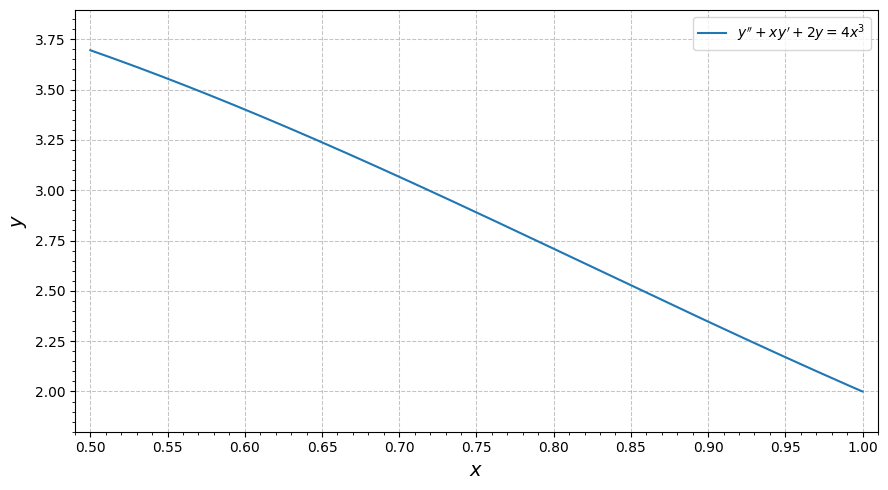

In [105]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.set_ylim(Y_fd.min() - 0.2, Y_fd.max() + 0.2)
ax.set_xlim(X_fd.min() - 0.01, X_fd.max() + 0.01)

ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$y$", fontsize=14)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax.grid(True, which="major", linestyle="--", linewidth=.75, alpha=.75)

colors = [plt.cm.tab10(i) for i in range(5)]

ax.plot(
    X_fd, Y_fd,
    color=colors[0],
    label=r"$y'' + x y' + 2y = 4x^3 $"
)

# ax.plot(
#     Y_fd, X_fd,
#     color=colors[1],
#     label=r"$y'' - 5y' + 6y = 3$"
# )

plt.legend(loc='upper right')
plt.tight_layout()

plt.show()